Выполнила: Бердникович Алеся, 4-сложная

# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np
import math

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    zero=(arr==0)
    if len(np.where(arr==0)[0])>0:
        zero1=zero[:-1]
        arr1=arr[1:]
        print(arr1[zero1].max())
    else:
        print (None)
    

Проверим на примере:

In [3]:
arr = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
max_element(arr)

5


Проверим, если в списке нет нулей

In [4]:
arr = np.array([6, 2,  3,  5, 7]) 

max_element(arr)

None


**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [5]:
def nearest_value(X, v):
    X1=abs(X-v)
    print(X.ravel()[np.argmin(X1)])

In [6]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4


**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [7]:
def scale(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    if len(np.where(std==0)[0])==0:
        print((X-mean)/std)
    else:
        std[std == 0] = 1
        print((X-mean)/std)

Я проверила на простой матрице, что он по умолчанию будет делить каждый столбец матрицы на соответстыующий ему элемент вектора стандартных отклонений и аналогично с мат ожиданиями.

In [8]:
X= np.random.randint(0, 100, (3,10))
scale(X)   

[[-0.75173097  0.87481777  0.25626989  1.36168561 -1.41404746  0.94867256
  -1.40588501 -0.95786289  1.17294338  0.30656967]
 [ 1.41325423 -1.39970842  1.07633353 -0.35014773  0.72579427 -1.3826398
   0.83566592  1.37997196  0.09774528  1.04233688]
 [-0.66152326  0.52489066 -1.33260342 -1.01153788  0.68825319  0.43396724
   0.5702191  -0.42210907 -1.27068866 -1.34890655]]


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [9]:
def get_stats(X):
    print ('det:',(np.linalg.det(X)))
    print ('tr:',(np.trace(X)))
    print ('min:',(np.min(X)))
    print ('max:', (np.max(X)))
    print ('Норма Фробениуса:', (np.linalg.norm(X,ord='fro')))
    print ('Собственные числа:', (np.linalg.eig(X))[0])
    print ('Обратная матрица:', (np.linalg.inv(X)))

In [10]:
X= np.random.normal(10, 1, size = (3,3))
get_stats(X)

det: 15.9177504639
tr: 32.6739770914
min: 9.32279281845
max: 11.66491846
Норма Фробениуса: 31.3312870486
Собственные числа: [ 31.2539025+0.j           0.7100373+0.07177361j   0.7100373-0.07177361j]
Обратная матрица: [[ 0.85811874 -0.48013313 -0.42944215]
 [ 0.97320125  0.15435031 -1.21161846]
 [-1.93545142  0.37453345  1.80778985]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [11]:
a=[]
for exp_num in range(100):
    A = np.random.normal(0, 1, (10,10))
    B = np.random.normal(0, 1, (10,10))
    AB=np.dot(A,B)
    a.append(np.max(AB))

In [12]:
print('Среднее значение по эксперименту:',np.mean(a))
print('95% квантиль', np.percentile(a, 95))

Среднее значение по эксперименту: 8.50391860575
95% квантиль 12.7504713716


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2]:
import pandas as pd
d = pd.read_csv('2008.csv.mdlp')
d.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111,2055,2308,2300,WN,242,...,3,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426,1410,1730,1728,XE,2380,...,4,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143,1145,1501,1520,WN,1769,...,4,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141,1144,1323,1335,OO,3802,...,4,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815,820,1243,1300,WN,399,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [14]:
pd.isnull(d).sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

Да, пропущеные значения в данных есть

In [15]:
nulls=(pd.isnull(d).sum()).sum()
print('Всего пропущенных элементов в таблице "объект-признак:', nulls)

Всего пропущенных элементов в таблице "объект-признак: 355215


In [16]:
nulls_obj=(pd.isnull(d).sum(axis=1)!=0)
print('Всего объектов имеют хотя бы один пропуск:',nulls_obj.sum())

Всего объектов имеют хотя бы один пропуск: 70000


In [17]:
nulls_= (pd.isnull(d).sum()!=0)
print('Всего признаков имеют хотя бы одно пропущенное значение:',nulls_.sum())

Всего признаков имеют хотя бы одно пропущенное значение: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [18]:
tar_nulls=(pd.isnull(d).sum())['DepDelay']
print('В целевой переменной пропусков:',tar_nulls)

В целевой переменной пропусков: 1399


Рассмотрим объекты с пропусками в целвой переменной:

In [19]:
tar_null_obj=d[(pd.isnull(d)['DepDelay'])]
tar_null_obj.shape

(1399, 29)

Посмотрим на пропуски по другим признакам:

In [20]:
pd.isnull(tar_null_obj).sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime              1399
CRSDepTime              0
ArrTime              1399
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum               820
ActualElapsedTime    1399
CRSElapsedTime          4
AirTime              1399
ArrDelay             1399
DepDelay             1399
Origin                  0
Dest                    0
Distance                0
TaxiIn               1399
TaxiOut              1399
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay         1399
WeatherDelay         1399
NASDelay             1399
SecurityDelay        1399
LateAircraftDelay    1399
dtype: int64

Посмотрим на разброс значиний каждого признака для данной подвыборки:

In [21]:
np.std(tar_null_obj)

Year                    0.000000
Month                   3.703790
DayofMonth              8.582038
DayOfWeek               2.017931
DepTime                      NaN
CRSDepTime            462.681660
ArrTime                      NaN
CRSArrTime            480.647577
FlightNum            2130.627486
ActualElapsedTime            NaN
CRSElapsedTime         57.614958
AirTime                      NaN
ArrDelay                     NaN
DepDelay                     NaN
Distance              461.709737
TaxiIn                       NaN
TaxiOut                      NaN
Cancelled               0.000000
Diverted                0.000000
CarrierDelay                 NaN
WeatherDelay                 NaN
NASDelay                     NaN
SecurityDelay                NaN
LateAircraftDelay            NaN
dtype: float64

In [22]:
tar_null_obj['Year'].value_counts()

2008    1399
Name: Year, dtype: int64

In [23]:
tar_null_obj['Diverted'].value_counts()

0    1399
Name: Diverted, dtype: int64

In [24]:
tar_null_obj['Cancelled'].value_counts()

1    1399
Name: Cancelled, dtype: int64

Три признака: Year, Diverted, Cancelled принимают только одно значение на данной подвыборке. Но чтобы понять, могут ли они помочь в предсказании целевой переменной, надо посмотреть на их дисперсию на подвыборке из объектов без пропусков в переменных.

Исключим объекты с пропусками в целевой переменной и нулевым значением.

In [3]:
d1= d[((d.DepDelay!=0)&((pd.isnull(d)['DepDelay'])==False))]

In [4]:
d1.shape

(63404, 29)

In [128]:
np.std(d1)

Year                    0.000000
Month                   3.413304
DayofMonth              8.813149
DayOfWeek               1.995788
DepTime               478.149179
CRSDepTime            463.294804
ArrTime               506.800954
CRSArrTime            482.381056
FlightNum            1946.917688
ActualElapsedTime      70.438409
CRSElapsedTime         69.903126
AirTime                67.744981
ArrDelay               39.150248
DepDelay               36.045843
Distance              567.832049
TaxiIn                  4.884242
TaxiOut                11.381227
Cancelled               0.013756
Diverted                0.048904
CarrierDelay           39.008288
WeatherDelay           17.909441
NASDelay               32.277248
SecurityDelay           2.090037
LateAircraftDelay      39.428528
dtype: float64

По нашим "подозрительным" переменным разброс также мал, посмотрим на него:

In [28]:
d1['Year'].value_counts()

2008    63404
Name: Year, dtype: int64

In [29]:
d1['Diverted'].value_counts()

0    63252
1      152
Name: Diverted, dtype: int64

In [30]:
d1['Cancelled'].value_counts()

0    63392
1       12
Name: Cancelled, dtype: int64

Явно исключаем переменную Year и Cancelled. Так как все наблюдения в выборке за 2008 год и практически все рейсы, по которым есть данные целевой переменной не были отменены. Также можем исключить и переменную CancellationCode (тк исключаем Cancelled).Переменная Diverted только в 152 случаях их 70000 принимает значение 1, но будем считать, что она может оказаться значимой. 

In [5]:
d2=d1.drop(['Year','Cancelled', 'CancellationCode'], 1).reset_index(drop=True)
d2.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6,18,3,2111,2055,2308,2300,WN,242,N699SW,...,CLE,307,3,8,0,NaN,NaN,NaN,NaN,NaN
1,6,4,3,1426,1410,1730,1728,XE,2380,N15980,...,AVL,834,4,12,0,NaN,NaN,NaN,NaN,NaN
2,8,3,7,1143,1145,1501,1520,WN,1769,N464WN,...,TPA,997,4,9,0,NaN,NaN,NaN,NaN,NaN
3,1,23,3,1141,1144,1323,1335,OO,3802,N465SW,...,FCA,532,4,19,0,NaN,NaN,NaN,NaN,NaN
4,5,4,7,815,820,1243,1300,WN,399,N489WN,...,AUS,1090,4,8,0,NaN,NaN,NaN,NaN,NaN


Выделим отдельно целевую переменную:

In [6]:
tar=d2.DepDelay
X=d2.drop(['DepDelay'],1).reset_index(drop=True)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

Создадим новые столбцы и заполним их значениями, которые будем преобразовывать и сразу удалим ненужные старые признаки

In [7]:
X['DepTime_Hour']=X['DepTime']
X['DepTime_Minute'] =X['DepTime']
X['CRSDepTime_Hour']=X['CRSDepTime']
X['CRSDepTime_Minute'] =X['CRSDepTime']
X['ArrTime_Hour']=X['ArrTime']
X['ArrTime_Minute'] = X['ArrTime']
X['CRSArrTime_Hour']=X['CRSArrTime'] 
X['CRSArrTime_Minute'] = X['CRSArrTime']
X=X.drop(['DepTime','CRSDepTime','ArrTime','CRSArrTime'],1).reset_index(drop=True)

In [8]:
X['DepTime_Hour']=X['DepTime_Hour']//100
X['CRSDepTime_Hour']=X['CRSDepTime_Hour']//100
X['ArrTime_Hour']=X['ArrTime_Hour']//100
X['CRSArrTime_Hour']=X['CRSArrTime_Hour']//100
X['DepTime_Minute']=X['DepTime_Minute']%100
X['CRSDepTime_Minute']=X['CRSDepTime_Minute']%100
X['ArrTime_Minute']=X['ArrTime_Minute']%100 
X['CRSArrTime_Minute']=X['CRSArrTime_Minute']%100

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

В датасете многие признаки также как и целевая переменная показывают задержку, поэтому корреляция целевой переменной с ними будет большая, но на тестово выборке данных по этим переменным не будет и поэтому в прогнозе они участвовать не будут. Найдем корреляцию между признаками, но надо сначала объединить обратно матрицу с целевой переменной.

In [9]:
X['DepDelay']=tar

In [10]:
X.columns[:-1]

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour',
       'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')

In [94]:
a=[]
for i in X.columns[:-1]:
    try:
        if abs(X[i].corr(tar)) >= 0.7:
            print('Корреляция с целевой переменной:',(i, (X[i].corr(tar))))
    except TypeError:
        a.append('null')
                

Корреляция с целевой переменной: ('ArrDelay', 0.93352593848194243)


In [11]:
X= X.drop(['ArrDelay'],axis=1).reset_index(drop=True)

Признаки которые мы создавали с минутами и часами явно будут сильно коррелировать между собой. Проверим

In [179]:
a=[]
for i in X.columns[:-1]:
    for j in X.columns[:-1]:
        try:
            if abs(X[i].corr(X[j])) >= 0.7:
                if abs(X[i].corr(X[j])) <1:
                    print('Высокая корреляция наблюдается между:',(i,j, (X[i].corr(X[j]))))
        except TypeError:
            a.append('null')


            

Высокая корреляция наблюдается между: ('ActualElapsedTime', 'ActualElapsedTime', 0.99999999999999978)
Высокая корреляция наблюдается между: ('ActualElapsedTime', 'CRSElapsedTime', 0.97997930142573386)
Высокая корреляция наблюдается между: ('ActualElapsedTime', 'AirTime', 0.98440124510666194)
Высокая корреляция наблюдается между: ('ActualElapsedTime', 'Distance', 0.96508855709566399)
Высокая корреляция наблюдается между: ('CRSElapsedTime', 'ActualElapsedTime', 0.97997930142573375)
Высокая корреляция наблюдается между: ('CRSElapsedTime', 'AirTime', 0.98829345460618712)
Высокая корреляция наблюдается между: ('CRSElapsedTime', 'Distance', 0.98347767148977894)
Высокая корреляция наблюдается между: ('AirTime', 'ActualElapsedTime', 0.98440124510666205)
Высокая корреляция наблюдается между: ('AirTime', 'CRSElapsedTime', 0.98829345460618712)
Высокая корреляция наблюдается между: ('AirTime', 'AirTime', 0.99999999999999978)
Высокая корреляция наблюдается между: ('AirTime', 'Distance', 0.983222043

Можно удалить признаки сильно скоррелированные между собой, точнее оставить некоторые. Оставим 'Distance' и 'ArrTime_Hour'. А все признаки с минутами вообще смысла  по-моему не имеют, удалим тоже. 

In [12]:
X.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour',
       'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute',
       'CRSArrTime_Hour', 'CRSArrTime_Minute', 'DepDelay'],
      dtype='object')

In [13]:
X=X.drop([ 'ActualElapsedTime','AirTime','CRSElapsedTime','DepTime_Hour',
          'CRSDepTime_Hour','CRSArrTime_Hour','ArrTime_Minute','DepTime_Minute',
          'CRSDepTime_Minute','CRSArrTime_Minute'],axis=1).reset_index(drop=True)

In [14]:
X=X.drop(['TailNum'],1).reset_index(drop=True)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [15]:
%matplotlib inline

In [16]:
tar=X.DepDelay
X=X.drop(['DepDelay'],1)

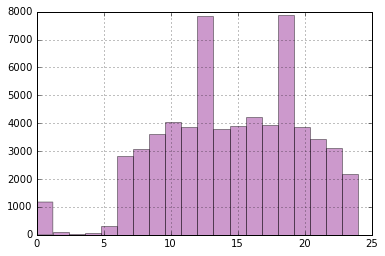

In [425]:
X['ArrTime_Hour'].hist(bins=20,color="purple",alpha=0.4)

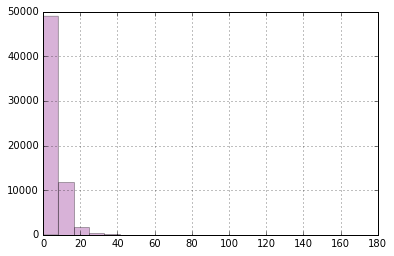

In [29]:
X['TaxiIn'].hist(bins=20,color="purple",alpha=0.3)

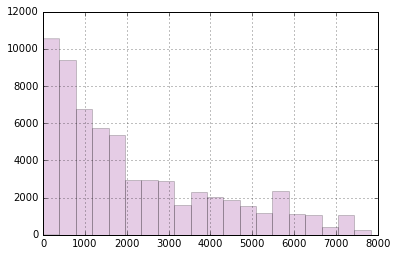

In [30]:
X['FlightNum'].hist(bins=20,color="purple",alpha=0.2)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Мы видим, что значения различнх признаков отличаются на порядки (цена деления у одних 5, а у других  1000), при оценке коэффициентов регрессии, меньшие по масштабу признаки будут иметь бОльшие веса, а признаки измеряемые в высоких порядках будут иметь маленькие беты, что плохо интерпретируемо. Плюс по графикам видно, что разброс одного признака 0-8000, а другого 0-40, поэтому также необхдимо разделить на стандартные отклонения, чтобы привести признаки в сравнимый вид и придать интерпретируемость весам в регресии.

Масштабирование как раз решает эту проблему (так как мы вычитаем м.о. и делим на ст. отклонение)

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [17]:
from sklearn.preprocessing import StandardScaler

Разделим признаки на вещественные и категориальные ( ничего страшного не случится если мы вместе с вещественными отмасштабируем бинарные, кроме того что беты регрессии будут по-другому интерпретироваться)

In [18]:
def transform_data(X):
    cat= X.select_dtypes(exclude = [np.number, np.int64])
    num=X.select_dtypes([np.number, np.int64])
    for i in num:
        X[i].fillna(0, inplace = True)
        X[i] = StandardScaler().fit_transform(X[i])
    
    for i in cat:
        X[i].fillna("nan", inplace = True)
    dum=pd.get_dummies(cat)
    X=pd.concat([dum,num], axis = 1)

    return X


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [22]:
X1= transform_data(X)

/Users/Air11/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Air11/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Air11/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [23]:
X1.shape

(63404, 628)

Получилось 628 признаков. Проверим удалились ли все пропуски:

In [24]:
pd.isnull(X1).sum().sum()

0

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X1, tar, test_size=0.3, random_state=1234)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [26]:
reg = LinearRegression().fit(X_train[:1000], y_train[:1000])
y_pred = reg.predict(X_test)
y_pred1 = reg.predict(X_train[:1000])

In [128]:
print("MSE train:",mean_squared_error(y_train[:1000], y_pred1))
print("R2 train",r2_score(y_train[:1000], y_pred1))
print("MSE test:",mean_squared_error(y_test, y_pred))
print("R2 test",r2_score(y_test, y_pred))

MSE train: 56.8177686768
R2 train 0.955183413933
MSE test: 3.69995130127e+23
R2 test -2.71039643244e+20


Значения MSE и R2 на тестовой и обучающей выборках различаются, MSE на тастовой ниже, но и R2  становися отрицательным.Что же это значит.... Посмотрим на коэф

In [129]:
print( reg.coef_)

[ -6.57314295e+13  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13
  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13
  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13
  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13
  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13  -6.57314295e+13
  -1.92112960e+11  -1.92112960e+11  -1.92112960e+11   7.68512669e+12
   1.20406655e+13  -1.92112960e+11  -1.92112960e+11  -3.06960246e+13
   3.24012549e+13   1.26002715e+13  -1.92112960e+11  -1.92112960e+11
  -6.47397208e+13   2.67196221e+12  -5.37607846e+12  -1.92112960e+11
  -1.92112960e+11  -1.70481307e+12  -1.92112960e+11   2.19584107e+12
  -1.92112960e+11  -1.92112960e+11  -1.92112960e+11   3.25426545e+12
  -1.92112960e+11   3.37896941e+12  -1.92112960e+11  -9.76885659e+12
   8.51737865e+11  -1.92112960e+11   5.74617588e+12  -7.96379544e+10
   8.45309600e+09  -1.92112960e+11  -1.92112960e+11  -1.92112960e+11
  -1.92112960e+11  -1.92112960e+11

In [131]:
np.mean(reg.coef_)

-2270409809565.4917

In [132]:
np.max(reg.coef_)

32401254944357.402

In [133]:
np.min(reg.coef_)

-65731429530802.875

Получается, модель придает очень большой вес значениям некоторых категориальных переменных ( точнее дамми- перменным, которые мы создали). То есть модель не обучается, а запоминает конкретные объекты и их ответы. Нужна регуляризация!

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [27]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold

In [516]:
folds = KFold(n_splits=5,random_state=1234)
alpha_grid =  np.arange(0, 5, 0.05)
lasso = LassoCV(alphas=alpha_grid,cv=folds)
lasso.fit(X_train[:1000], y_train[:1000])
lasso_pred = lasso.predict(X_test)
lasso_pred1 = lasso.predict(X_train[:1000])
print('alpha:', lasso.alpha_)
print("MSE train:",mean_squared_error(y_train[:1000], lasso_pred1))
print("R2 train",r2_score(y_train[:1000], lasso_pred1))
print("MSE test:",mean_squared_error(y_test, lasso_pred))
print("R2 test",r2_score(y_test, lasso_pred))

/Users/Air11/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:461: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/Air11/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.05
MSE train: 79.8608232776
R2 train 0.937007567472
MSE test: 93.448073296
R2 test 0.931544686982


Стало гораздо лучше

In [141]:
folds = KFold(n_splits=5,random_state=1234)
alpha_grid =  np.arange(0, 1000, 5)
ridge = RidgeCV(alphas=alpha_grid,cv=folds)
ridge.fit(X_train[:1000], y_train[:1000])
ridge_pred = ridge.predict(X_test)
ridge_pred1 = ridge.predict(X_train[:1000])
print('alpha:', ridge.alpha_)
print("MSE train:",mean_squared_error(y_train[:1000], ridge_pred1))
print("R2 train",r2_score(y_train[:1000], ridge_pred1))
print("MSE test:",mean_squared_error(y_test, ridge_pred))
print("R2 test",r2_score(y_test, ridge_pred))

alpha: 15
MSE train: 74.2640471586
R2 train 0.941422179387
MSE test: 94.0892665268
R2 test 0.931074981382


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [63]:
X_train['beta0'] = 1
X_test['beta0'] = 1

/Users/Air11/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Air11/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [64]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [30]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pred = np.dot(X,w)
    return pred

In [31]:
reg1 = LinearRegression().fit(X_train, y_train)
y_pred = reg1.predict(X_test)
y_pred1 = reg1.predict(X_train)

In [32]:
make_pred(X_test,reg1.coef_)

array([ -4.18894558e+11,  -4.18894558e+11,  -4.18894558e+11, ...,
        -4.18894558e+11,  -4.18894558e+11,  -4.18894558e+11])

In [33]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    return ((1/X.shape[0])*((np.dot(((y-np.dot(X,w))/y).T,((y-np.dot(X,w))/y)))))

In [34]:
get_func(reg1.coef_, X_test, y_test)

2.7993739319121799e+22

<img src="MSPE2.jpg" width="400" height="200"> 

In [98]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    return ((1/X.shape[0])*((-2*np.dot((X.T)/y, ((y- np.dot(X,w))/y))))) 
#    return ((1/X.shape[0])*((-2*(np.dot(X.T,y)/y))+2* (np.dot(np.dot(X.T,X),w)/y))) # вот тут что то не то с размерностями хотя это то же самое вроде бы 

In [99]:
get_grad(reg1.coef_, X_train, y_train)

array([ -4.74108477e+09,  -1.11077169e+10,  -1.26295380e+08,
        -2.59123776e+09,  -2.96301464e+09,  -5.74181099e+09,
        -1.01147007e+10,  -4.56336353e+09,  -1.71159899e+09,
        -4.85740719e+09,  -1.25511380e+09,  -7.15019135e+09,
        -5.95681820e+09,  -1.00440345e+09,  -8.64696075e+09,
        -9.13763659e+09,  -7.98714408e+09,  -3.62720381e+10,
        -5.70743834e+09,  -2.33909442e+09,  -6.23033706e+07,
        -3.86688880e+07,  -8.04429107e+08,  -2.96894370e+06,
        -4.76769708e+06,  -5.32284028e+07,  -5.48072321e+07,
        -0.00000000e+00,  -0.00000000e+00,  -7.71059330e+05,
        -6.93626914e+07,  -1.04877350e+07,  -2.79242263e+04,
        -2.80220921e+08,  -4.71919425e+06,  -1.75466063e+08,
        -2.69215548e+08,  -6.38620342e+07,  -8.15062240e+09,
        -4.45027536e+07,  -1.45389687e+09,  -5.05650002e+07,
        -5.44906036e+07,  -3.82331099e+07,  -7.08386276e+08,
        -8.14917837e+06,  -3.92457576e+07,  -4.20121723e+06,
        -3.21377128e+07,

In [37]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
       return ((1/X.shape[0])*((np.dot(((y-np.dot(X,w))/y).T,((y-np.dot(X,w))/y)))))+np.dot(w.T,w)

In [38]:
get_reg_func(reg1.coef_, X_test, y_test)

1.0038443853180403e+26

In [100]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return ((1/X.shape[0])*((-2*np.dot((X.T)/y, ((y- np.dot(X,w))/y))))) +2*w

In [101]:
get_reg_grad(reg1.coef_, X_test, y_test)

array([  3.36478896e+11,   3.30542514e+11,   3.40603272e+11,
         3.38253339e+11,   3.37846014e+11,   3.34171122e+11,
         3.31290971e+11,   3.36274515e+11,   3.39018325e+11,
         3.36866498e+11,   3.39689604e+11,   3.33092853e+11,
         3.34548789e+11,   3.39522553e+11,   3.31410250e+11,
         3.31800651e+11,   3.33088953e+11,   3.03947403e+11,
         3.34290397e+11,   3.38375822e+11,  -1.17519900e+12,
        -1.17520429e+12,  -1.17631425e+12,  -1.17512715e+12,
        -1.17512655e+12,  -1.17517743e+12,  -1.17513827e+12,
        -6.19646375e+10,  -4.10732479e+10,  -1.17516987e+12,
        -1.17520721e+12,  -1.17517595e+12,  -1.17512583e+12,
        -1.17529593e+12,  -1.17513860e+12,  -1.17544546e+12,
        -1.17539040e+12,  -1.17518788e+12,  -1.18260341e+12,
        -1.17514612e+12,  -1.17621021e+12,  -1.17519112e+12,
        -1.17513876e+12,  -1.17514092e+12,  -1.17574387e+12,
        -1.17512803e+12,  -1.17517084e+12,  -1.17512656e+12,
        -1.17513921e+12,

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

Будем использовать функции, созданные нами ранее:

In [111]:
#при написании данной функции я использовала материалы семинара по майнору ИАД, так что похожая функция мб у других
import matplotlib.pyplot as plt  
def grad_descent(X, y, step_size, max_iter, eps, is_reg): 
        w_list=[]
        w0 = np.random.normal(size=X.shape[1])
        MSPE = []
        w=0
        if is_reg==False:

            for i in range(max_iter):
                MSPE.append(get_func(w0, X, y))
                w = w0 - step_size*get_grad(w0, X, y)
                w_list.append(w)
                if np.dot(((w)-w0).T,((w)-w0))<eps:
                    break
                w0=w
            
#            print('Оптимальные веса:',w) # чтобы два раза не выводилось 
#            print('Значения MSPE:',MSPE)
            return  w, MSPE
        else:
            for i in range(max_iter):
                MSPE.append(get_reg_func(w0, X, y))
                w = w0 - step_size*get_reg_grad(w0, X, y)
                w_list.append(w)
                if np.dot(((w)-w0).T,((w)-w0))<eps:
                    break
                w0=w
            
#            print('Оптимальные веса:',w)
#            print('Значения MSPE:',MSPE)
            return  w, MSPE
#        plt.figure(figsize=[10,3])
    
#        plt.subplot(1,2,1)
#        plt.scatter(w_list, MSPE, c="r")
#        plt.plot(w_list, MSPE, c="r")
#        plt.plot(w, get_func(w0, X, y), c="b")
#        plt.xlim([-1,2.5])
#        plt.ylim([0,3])
#        plt.title("Descent trajectory")
#        plt.show()   

    

In [103]:
grad_descent(X_test, y_test, step_size=1, max_iter=20, eps=0.1, is_reg= False)

(array([  4.10299863e-01,   1.13083593e+00,   2.18680992e-01,
         -4.71830916e-01,  -2.65124300e-01,   2.12010387e+00,
          1.11834983e+00,  -1.50364623e+00,   1.61612427e+00,
         -1.34970543e+00,  -1.10242853e+00,   9.50657983e-03,
          2.43569607e+00,   2.10201536e-01,  -2.50982368e-01,
         -1.11878556e-01,  -1.59767021e+00,   1.99228709e-01,
         -1.07789913e+00,   1.32559777e-01,   4.89303564e-01,
         -2.33565270e+00,   4.20834282e-01,   5.92140146e-01,
          1.28055327e+00,  -9.62957825e-01,   4.30261763e-01,
         -4.30978561e-01,   3.51218937e-01,  -2.59239751e-01,
          2.30547063e-03,   3.03111012e+00,  -1.29711772e+00,
          1.63279374e-01,  -5.32027534e-01,   2.09879173e+00,
         -1.74541539e+00,   2.33874363e-01,   9.75878880e-02,
          1.60739090e+00,  -1.59637954e-01,   1.38870605e+00,
          1.42306969e+00,  -4.54873328e-01,  -8.17890656e-01,
          1.57129203e+00,   1.33101867e+00,  -6.17757814e-01,
        

Сначала выводятся оптимальные веса, потом значения MSPE

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [113]:
MSPE_001=grad_descent(X_train, y_train, step_size=0.001, max_iter=100, eps=0.000000001, is_reg= False)
MSPE_001

(array([ -2.00778492e-01,  -7.04041227e-01,   2.12373578e-01,
         -3.02153168e-01,  -1.30329732e+00,  -8.67648861e-01,
          5.30658958e-01,  -1.79341245e-01,   1.13764786e+00,
         -3.08237202e+00,  -1.94152836e+00,  -4.91806654e-01,
         -6.01111296e-01,   1.38920630e+00,   3.21157700e-01,
          9.46257893e-01,  -1.69827673e-01,   4.60010970e-01,
         -2.49553878e-01,   3.13831336e-01,   1.32315636e+00,
         -2.67788915e-01,  -1.77205939e+00,   2.47057184e+00,
         -4.66698710e-01,  -1.85966065e+00,   3.57645010e-01,
          4.83304700e-02,   1.21332222e+00,   6.25944065e-02,
         -1.03914786e-01,   7.31276925e-01,  -3.04783301e-01,
          7.18759383e-01,   1.48817896e+00,  -8.28985203e-01,
         -5.08484521e-01,  -1.19007408e+00,  -2.14322847e+00,
         -1.88356637e+00,   1.60260072e+00,   4.51265156e-01,
          1.85285014e+00,   8.59693417e-02,   6.34257777e-01,
          8.71005550e-01,  -6.51499268e-01,  -9.07716087e-01,
        

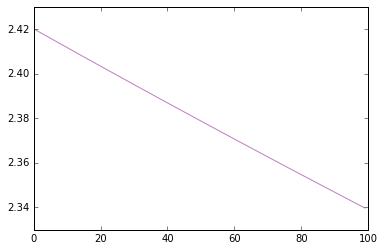

In [115]:
plt.plot(MSPE_001[1],color="purple",alpha=0.5)

In [116]:
w_1=grad_descent(X_train, y_train, step_size=1, max_iter=100, eps=0.00001, is_reg= False)[0]
MSPE_1=grad_descent(X_train, y_train, step_size=1, max_iter=100, eps=0.00001, is_reg= False)[1]

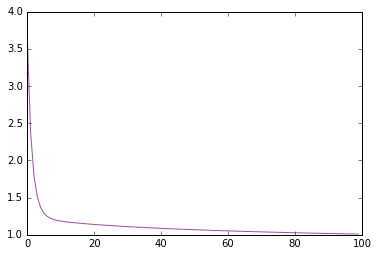

In [117]:
plt.plot(MSPE_1,color="purple",alpha=0.7)

In [118]:
w_10=grad_descent(X_train, y_train, step_size=10, max_iter=50, eps=0.00001, is_reg= False)[0]
MSPE_10=grad_descent(X_train, y_train, step_size=10, max_iter=50, eps=0.00001, is_reg= False)[1]

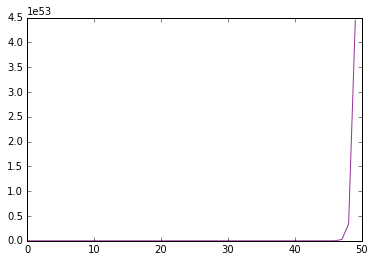

In [119]:
plt.plot(MSPE_10,color="purple",alpha=0.8)

Cпособ инициализации векторов:

Для нулей напишем новую функцию, и будем рассматривать для шага 1, чтобы для  случайной инициализации исп. предыдущие графики

In [120]:
def grad_descent_zero(X, y, step_size, max_iter, eps, is_reg): 
        w_list=[]
        w0 = np.zeros(X.shape[1])
        MSPE = []
        w=0
        if is_reg==False:

            for i in range(max_iter):
                MSPE.append(get_func(w0, X, y))
                w = w0 - step_size*get_grad(w0, X, y)
                w_list.append(w)
                if np.dot(((w)-w0).T,((w)-w0))<eps:
                    break
                w0=w
            return  w, MSPE
        else:
            for i in range(max_iter):
                MSPE.append(get_reg_func(w0, X, y))
                w = w0 - step_size*get_reg_grad(w0, X, y)
                w_list.append(w)
                if np.dot(((w)-w0).T,((w)-w0))<eps:
                    break
                w0=w

            return  w, MSPE

In [121]:
w_1_zero=grad_descent_zero(X_train, y_train, step_size=1, max_iter=50, eps=0.0001, is_reg= False)[0]
MSPE_1_zero=grad_descent_zero(X_train, y_train, step_size=1, max_iter=50, eps=0.0001, is_reg= False)[1]

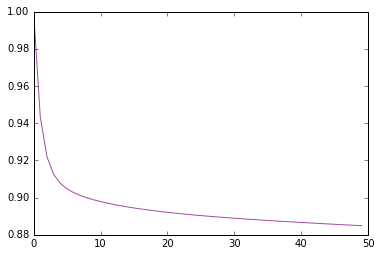

In [122]:
plt.plot(MSPE_1_zero,color="purple",alpha=0.7)

Я так понимаю, что шаг 10 слишком большой имы перешагиваем через локальный минимум. А если маленький шаг брать 0.001 и при случайной инициализации весов, то сходимость будет, но нужно больше итераций, а времени ждать нет! Но ответ- да зависит и от шага и от инициализации. При нуливых весах сходимость медленнее.

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [123]:
w_001_reg=grad_descent(X_train, y_train, step_size=1, max_iter=100, eps=0.001, is_reg= True)[0]
MSPE_001_reg=grad_descent(X_train, y_train, step_size=1, max_iter=100, eps=0.001, is_reg= True)[1]

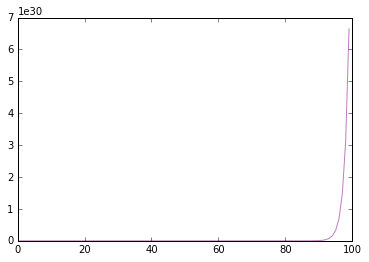

In [124]:
plt.plot(MSPE_001_reg,color="purple",alpha=0.5)

А без регуляризации:

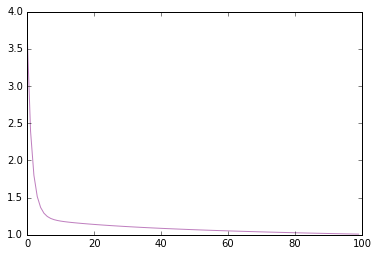

In [125]:
plt.plot(MSPE_1,color="purple",alpha=0.5)

Возможно нужен просто меньше шаг.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [126]:
reg2 = LinearRegression().fit(X_train, y_train)
y_pred = reg2.predict(X_test)
y_pred1 = reg2.predict(X_train)
print("MSPE test:",get_func(reg2.coef_ ,X_test, y_pred))

MSPE test: 2.98181890127e+27


А если обучать градиентным:

In [127]:
w_grad= grad_descent(X_test, y_test, step_size=1, max_iter=100, eps=0.0000001, is_reg= False)[0]

In [132]:
MSPE_grad=grad_descent(X_test, y_test, step_size=1, max_iter=100, eps=0.0000001, is_reg= False)[1]

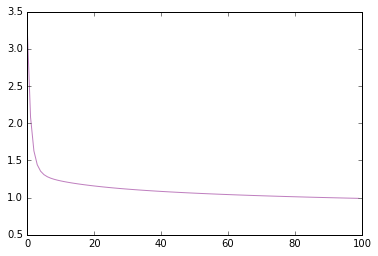

In [133]:
plt.plot(MSPE_grad,color="purple",alpha=0.5)

In [134]:
print("MSPE test:",get_func(w_grad,X_test, y_pred))

MSPE test: 16192.2600016


С помощью градиентного спуска удалось досичь меньшего значения функционала качества. Наверное потому что в регрессии мы оптимизируем другой функционал и не особо корректно так сравнивать.